In [28]:
library(openintro)
library(ggplot2)
library(dplyr)
library(tidyr)
library(broom)
# setting the graphic width and height for ggplot
library(repr)
options(repr.plot.width=6, repr.plot.height=4)

Using the bdims dataset, create a scatterplot illustrating how a person's weight varies as a function of their height. Use color to separate by sex, which you'll need to coerce to a factor with `factor()`.

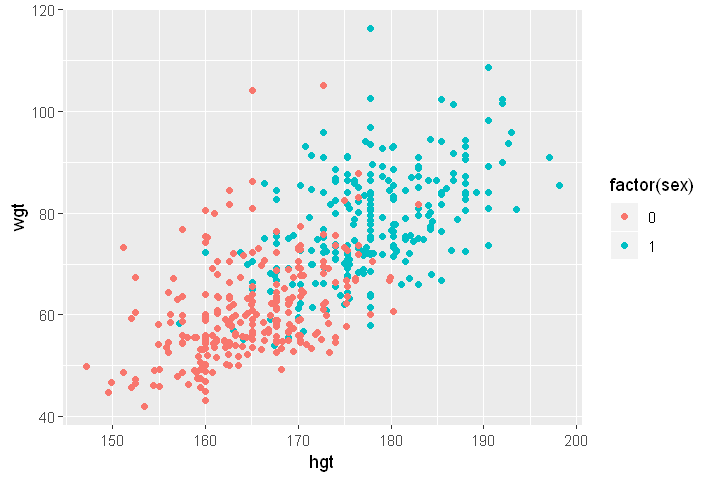

In [13]:
data(bdims)
# Body dimensions scatterplot
ggplot(bdims, aes(x = hgt, y = wgt, color = factor(sex)))+
  geom_point()

In [56]:
# Correlation of body dimensions
bdims %>%
  group_by(sex) %>%
  summarize(N = n(), r = cor(hgt, wgt))

sex,N,r
0,260,0.4310593
1,247,0.5347418


Using the smoking dataset, create a scatterplot illustrating how the amount that a person smokes on weekdays varies as a function of their age. 

Warning message:
"Removed 1270 rows containing missing values (geom_point)."

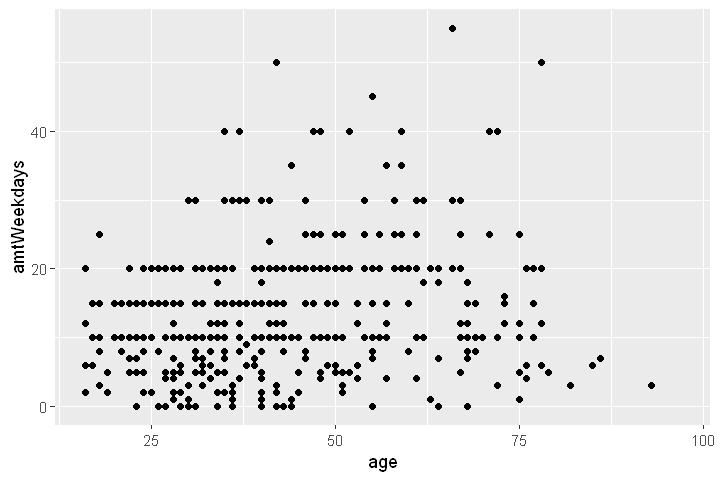

In [14]:
data(smoking)

# Smoking scatterplot
ggplot(smoking, aes(x = age, y = amtWeekdays))+
  geom_point()

Using the mammals dataset, create a scatterplot illustrating how the brain weight of a mammal varies as a function of its body weight.

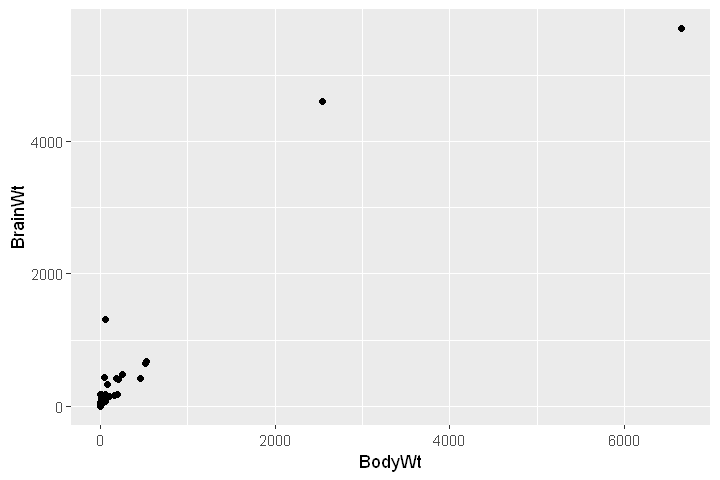

In [11]:
data(mammals)
# Mammals scatterplot
ggplot(mammals, aes(x = BodyWt, y = BrainWt)) +
  geom_point()

## Transformations

The relationship between two variables may not be linear. In these cases we can sometimes see strange and even inscrutable patterns in a scatterplot of the data. Sometimes there really is no meaningful relationship between the two variables. Other times, a careful transformation of one or both of the variables can reveal a clear relationship.

Recall the bizarre pattern that you saw in the scatterplot between brain weight and body weight among mammals in a previous exercise. Can we use transformations to clarify this relationship?

ggplot2 provides several different mechanisms for viewing transformed relationships. The `coord_trans()` function transforms the coordinates of the plot. Alternatively, the `scale_x_log10()` and `scale_y_log10()` functions perform a base-10 log transformation of each axis. Note the differences in the appearance of the axes.

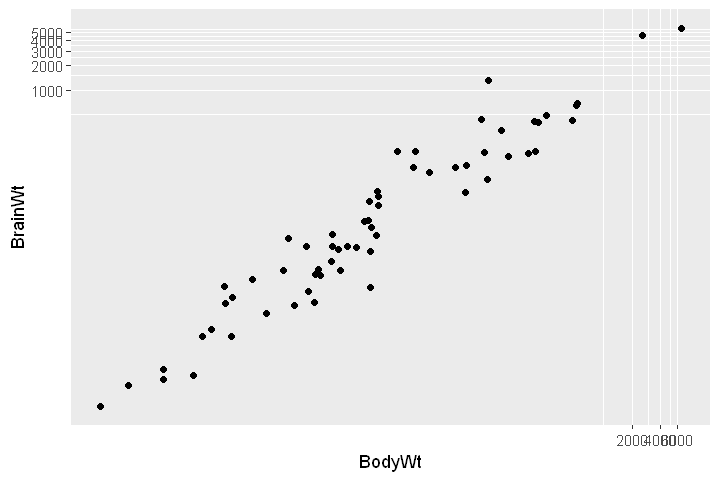

In [15]:
# Scatterplot with coord_trans()
ggplot(data = mammals, aes(x = BodyWt, y = BrainWt)) +
  geom_point() + 
  coord_trans(x = "log10", y = "log10")

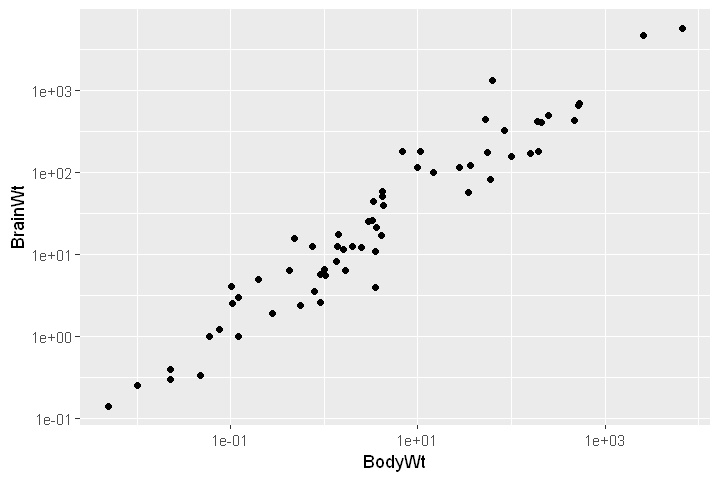

In [16]:
# Scatterplot with scale_x_log10() and scale_y_log10()
ggplot(data = mammals, aes(x = BodyWt, y = BrainWt)) +
  geom_point() +
  scale_x_log10() + scale_y_log10()

In [57]:
# Correlation among mammals, with and without log
mammals %>%
  summarize(N = n(), 
            r = cor(BodyWt, BrainWt), 
            r_log = cor(log(BodyWt), log(BrainWt)))

N,r,r_log
62,0.9341638,0.9595748


## Identifying outliers

Using the mlbBat10 dataset, create a scatterplot illustrating how the slugging percentage (SLG) of a player varies as a function of his on-base percentage (OBP). 

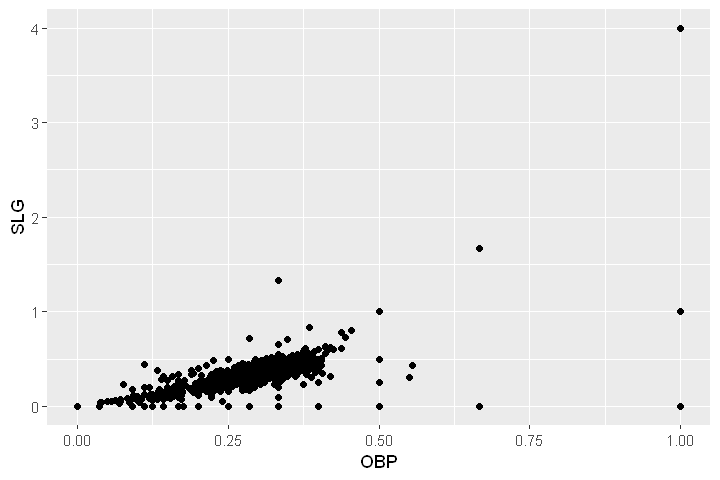

In [12]:
data(mlbBat10)
# Baseball player scatterplot
ggplot(mlbBat10, aes(x = OBP, y = SLG))+
  geom_point()

name,team,position,G,AB,R,H,2B,3B,HR,RBI,TB,BB,SO,SB,CS,OBP,SLG,AVG
B Wood,LAA,3B,81,226,20,33,2,0,4,14,47,6,71,1,0,0.174,0.208,0.146


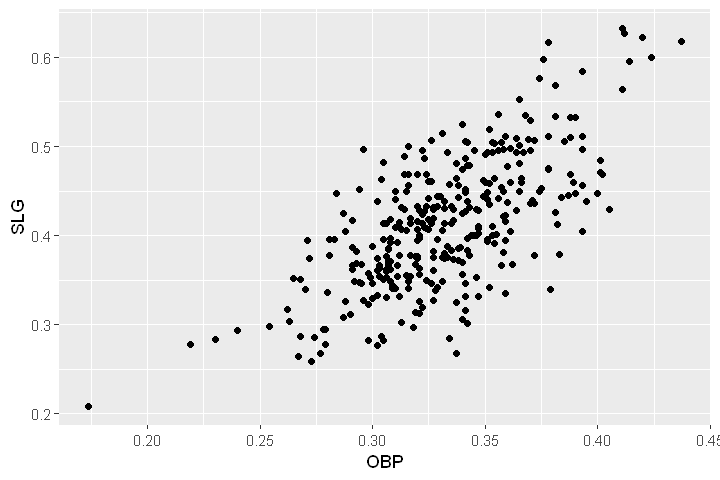

In [20]:
# Scatterplot of SLG vs. OBP where the at bat is at least 200
mlbBat10 %>%
  filter(AB >= 200) %>%
  ggplot(aes(x = OBP, y = SLG)) +
  geom_point()

# Identify the outlying player
mlbBat10 %>%
  filter(AB >= 200, OBP < 0.2)

In [58]:
# Correlation for all baseball players
mlbBat10 %>%
  summarize(N = n(), r = cor(OBP, SLG))

# Correlation for all players with at least 200 ABs
mlbBat10 %>%
  filter(AB >= 200) %>%
  summarize(N = n(), r = cor(OBP, SLG))

N,r
1199,0.8145628


N,r
329,0.6855364


## Correlation
<b>Computing correlation</b>

The `cor(x, y)` function will compute the <b>Pearson product-moment correlation</b> between variables, x and y. Since this quantity is symmetric with respect to x and y, it doesn't matter in which order you put the variables.

At the same time, the `cor()` function is very conservative when it encounters missing data (e.g. NAs). The `use` argument allows you to override the default behavior of returning NA whenever any of the values encountered is NA. Setting the use argument to "pairwise.complete.obs" allows `cor()` to compute the correlation coefficient for those observations where the values of x and y are both not missing.

In [22]:
data(ncbirths)
# Compute correlation between mothers age and weight of the baby
ncbirths %>%
  summarize(N = n(), r = cor(mage, weight)) 

# Compute correlation for all non-missing pairs between weeks of pregnancy and weight of the baby
ncbirths %>%
  summarize(N = n(), r = cor(weeks, weight, use = "pairwise.complete.obs"))

N,r
1000,0.05506589


N,r
1000,0.6701013


## Anscombe dataset
In 1973, Francis Anscombe famously created four datasets with remarkably similar numerical properties, but obviously different graphic relationships. The Anscombe dataset contains the x and y coordinates for these four datasets, along with a grouping variable, set, that distinguishes the quartet.

In [52]:
# changing the anscombe dataset to a long dataset
Anscombe <- anscombe %>%
    tibble::rowid_to_column("id")%>%
    gather(key = "set", value = "value", - id) %>%
    separate(col = set, into = c("x.y","set"), sep =  "(?<=[A-Za-z])(?=[0-9])") %>%
    spread(key = x.y, value = value)

head(anscombe, 2)
head(Anscombe, 2)

x1,x2,x3,x4,y1,y2,y3,y4
10,10,10,8,8.04,9.14,7.46,6.58
8,8,8,8,6.95,8.14,6.77,5.76


id,set,x,y
1,1,10,8.04
1,2,10,9.14


In [55]:
# Compute properties of Anscombe
Anscombe %>%
  group_by(set) %>%
  summarize(N = n(), mean(x), sd(x), mean(y),sd(y), cor(x,y))

set,N,mean(x),sd(x),mean(y),sd(y),"cor(x, y)"
1,11,9,3.316625,7.500909,2.031568,0.8164205
2,11,9,3.316625,7.500909,2.031657,0.8162365
3,11,9,3.316625,7.500000,2.030424,0.8162867
4,11,9,3.316625,7.500909,2.030579,0.8165214


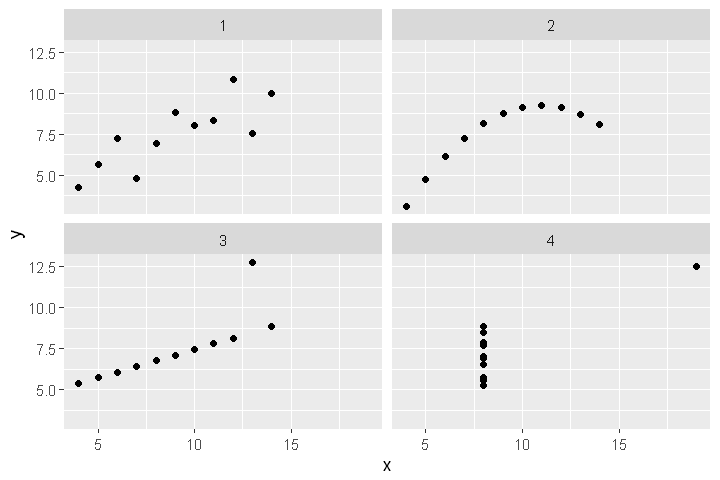

In [54]:
ggplot(data = Anscombe, aes(x = x, y = y)) +
  geom_point() +
  facet_wrap(~ set)

## The "best fit" line

The simple linear regression model for a numeric response as a function of a numeric explanatory variable can be visualized on the corresponding scatterplot by a straight line. This is a "best fit" line that cuts through the data in a way that minimizes the distance between the line and the data points. 

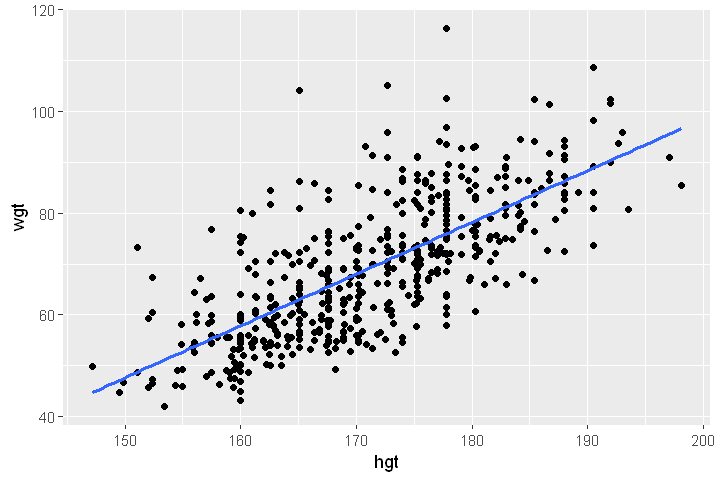

In [59]:
# Scatterplot with regression line
ggplot(data = bdims, aes(x = hgt, y = wgt)) + 
  geom_point() + 
  geom_smooth(method = "lm", se = FALSE)

## Fitting a linear model "by hand"

Recall the simple linear regression model:
$$ Y=b_0+b_1\times\ X $$

Two facts enable you to compute the slope $b_1$
and intercept $b_0$

of a simple linear regression model from some basic summary statistics.

First, the slope can be defined as:

$$ b_1=r_X,_Y \times\frac{s_Y}{s_X} $$

where $r_X,_Y$
represents the correlation (`cor()`) of $X$ and $Y$ and $s_X$ and $s_Y$ represent the standard deviation (`sd()`) of $X$ and $Y$, respectively.

Second, the point $(\overline{x},\overline{y})$
is always on the least squares regression line, where $\overline{x}$ and $\overline{y}$ denote the average of $x$ and $y$, respectively.

In [65]:
bdims_summary <- bdims %>% 
    summarise(N = n(),
           r = cor(wgt, hgt),
           mean_hgt = mean(hgt),
           sd_hgt = sd(hgt),
           mean_wgt = mean(wgt),
           sd_wgt = sd(wgt))
bdims_summary

N,r,mean_hgt,sd_hgt,mean_wgt,sd_wgt
507,0.7173011,171.1438,9.407205,69.14753,13.34576


To get intercept, first calculate slope, then solve
$$ Y=b_0+b_1\times X $$
for $b_0$. Finally, plug in mean_wgt for $Y$, mean_hgt for $X$, and slope for $b_1$.

$$ b_0 = Y - b_1 \times X $$

In [67]:
# Add slope and intercept
bdims_summary %>%
  mutate(slope = r * sd_wgt / sd_hgt, 
         intercept = mean_wgt - slope * mean_hgt)

N,r,mean_hgt,sd_hgt,mean_wgt,sd_wgt,slope,intercept
507,0.7173011,171.1438,9.407205,69.14753,13.34576,1.017617,-105.0113


## Regression to the mean

Regression to the mean is a concept attributed to Sir Francis Galton. The basic idea is that extreme random observations will tend to be less extreme upon a second trial. This is simply due to chance alone. While "regression to the mean" and "linear regression" are not the same thing, we will examine them together in this exercise.

One way to see the effects of regression to the mean is to compare the heights of parents to their children's heights. While it is true that tall mothers and fathers tend to have tall children, those children tend to be less tall than their parents, relative to average. That is, fathers who are 3 inches taller than the average father tend to have children who may be taller than average, but by less than 3 inches. 

Because the slope of the regression line is smaller than 1 (the slope of the diagonal line) for both males and females, we can verify Sir Francis Galton's regression to the mean concept! 

$$\widehat{poverty}=64.594−0.591⋅hsgrad$$

Which of the following is the correct interpretation of the slope coefficient?
<br>Among U.S. counties, each additional percentage point increase in the high school graduation rate is associated with about a 0.591 percentage point decrease in the poverty rate.

In [73]:
# Linear model for weight as a function of height
lm(wgt ~ hgt, data = bdims)

# Linear model for SLG as a function of OBP
lm(SLG ~ OBP, data = mlbBat10)

# Log-linear model for body weight as a function of brain weight
lm(log(BodyWt) ~ log(BrainWt), data = mammals)


Call:
lm(formula = wgt ~ hgt, data = bdims)

Coefficients:
(Intercept)          hgt  
   -105.011        1.018  



Call:
lm(formula = SLG ~ OBP, data = mlbBat10)

Coefficients:
(Intercept)          OBP  
   0.009407     1.110323  



Call:
lm(formula = log(BodyWt) ~ log(BrainWt), data = mammals)

Coefficients:
 (Intercept)  log(BrainWt)  
      -2.509         1.225  


## The lm summary output
The `coef()` function displays only the values of the coefficients. Conversely, the `summary()` function displays not only that information, but a bunch of other information, including the associated standard error and p-value for each coefficient, the $R^2$, adjusted $R^2$, and the residual standard error. The summary of an "lm" object in R is very similar to the output you would see in other statistical computing environments (e.g. Stata, SPSS, etc.)

In [76]:
mod <- lm(wgt ~ hgt, data = bdims)
# Show the coefficients
coef(mod)

# Show the full output
summary(mod)

(Intercept)         hgt 
-105.011254    1.017617


Call:
lm(formula = wgt ~ hgt, data = bdims)

Residuals:
    Min      1Q  Median      3Q     Max 
-18.743  -6.402  -1.231   5.059  41.103 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -105.01125    7.53941  -13.93   <2e-16 ***
hgt            1.01762    0.04399   23.14   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.308 on 505 degrees of freedom
Multiple R-squared:  0.5145,	Adjusted R-squared:  0.5136 
F-statistic: 535.2 on 1 and 505 DF,  p-value: < 2.2e-16


## Fitted values and residuals

Once you have fit a regression model, you are often interested in the fitted values ($\hat{y}_i$
) and the residuals ($e_i$), where $i$

indexes the observations. Recall that:

$$e_i=y_i−\hat{y}_i$$

The least squares fitting procedure guarantees that the mean of the residuals is zero (n.b., numerical instability may result in the computed values not being exactly zero). At the same time, the mean of the fitted values must equal the mean of the response variable. 

In [77]:
# Mean of weights equal to mean of fitted values?
mean(bdims$wgt) == mean(fitted.values(mod))

# Mean of the residuals
mean(residuals(mod))

[1] TRUE

[1] -1.266971e-15

## Tidying your linear model

As you fit a regression model, there are some quantities (e.g. $R^2$) that apply to the model as a whole, while others apply to each observation (e.g. $\hat{y}_i$). If there are several of these per-observation quantities, it is sometimes convenient to attach them to the original data as new variables.

The `augment()` function from the `broom` package does exactly this. It takes a model object as an argument and returns a data frame that contains the data on which the model was fit, along with several quantities specific to the regression model, including the fitted values, residuals, leverage scores, and standardized residuals.

In [78]:
# Load broom
library(broom)

# Create bdims_tidy
bdims_tidy <- augment(mod)

# Glimpse the resulting data frame
glimpse(bdims_tidy)

Observations: 507
Variables: 9
$ wgt        <dbl> 65.6, 71.8, 80.7, 72.6, 78.8, 74.8, 86.4, 78.4, 62.0, 81...
$ hgt        <dbl> 174.0, 175.3, 193.5, 186.5, 187.2, 181.5, 184.0, 184.5, ...
$ .fitted    <dbl> 72.05406, 73.37697, 91.89759, 84.77427, 85.48661, 79.686...
$ .se.fit    <dbl> 0.4320546, 0.4520060, 1.0667332, 0.7919264, 0.8183471, 0...
$ .resid     <dbl> -6.4540648, -1.5769666, -11.1975919, -12.1742745, -6.686...
$ .hat       <dbl> 0.002154570, 0.002358152, 0.013133942, 0.007238576, 0.00...
$ .sigma     <dbl> 9.312824, 9.317005, 9.303732, 9.301360, 9.312471, 9.3147...
$ .cooksd    <dbl> 5.201807e-04, 3.400330e-05, 9.758463e-03, 6.282074e-03, ...
$ .std.resid <dbl> -0.69413418, -0.16961994, -1.21098084, -1.31269063, -0.7...


## Making predictions

The `fitted.values()` function or the `augment()`-ed data frame provides us with the fitted values for the observations that were in the original data. However, once we have fit the model, we may want to compute expected values for observations that were not present in the data on which the model was fit. These types of predictions are called out-of-sample.

The ben data frame contains a height and weight observation for one person. The mod object contains the fitted model for weight as a function of height for the observations in the bdims dataset. We can use the `predict()` function to generate expected values for the weight of new individuals. We must pass the data frame of new observations through the newdata argument.

In [79]:
ben <- data.frame(wgt = 74.8, hgt = 182.8)

In [81]:
# Print ben
ben

# Predict the weight of ben
predict(mod, newdata = ben)

wgt,hgt
74.8,182.8


1 
81.00909

## Adding a regression line to a plot manually

The `geom_smooth()` function makes it easy to add a simple linear regression line to a scatterplot of the corresponding variables. And in fact, there are more complicated regression models that can be visualized in the data space with `geom_smooth()`. However, there may still be times when we will want to add regression lines to our scatterplot manually. To do this, we will use the `geom_abline()` function, which takes slope and intercept arguments. Naturally, we have to compute those values ahead of time, but we already saw how to do this (e.g. using `coef()`).

The coefs data frame contains the model estimates retrieved from `coef()`. Passing this to `geom_abline()` as the data argument will enable you to draw a straight line on your scatterplot.

In [107]:
coefs <- as.data.frame(coef(lm(wgt ~ hgt, data = bdims)))
coefs <- tibble::rownames_to_column(coefs, var = "key")
coefs <- rename(coefs, value = "coef(lm(wgt ~ hgt, data = bdims))")
coefs <- spread(coefs, key = key, value = value)


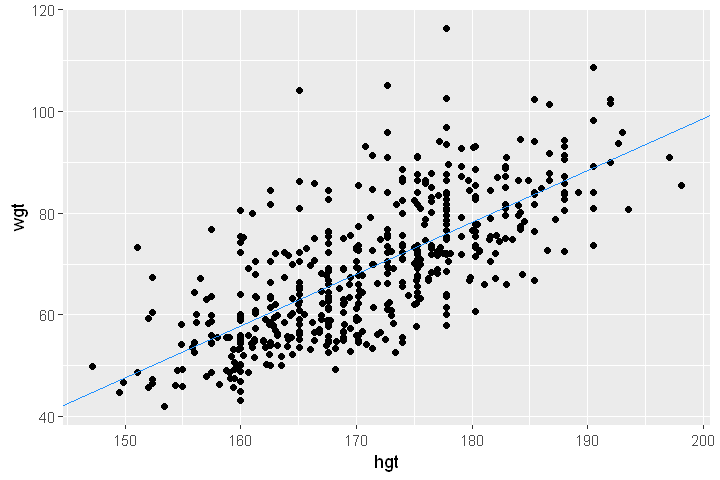

In [108]:
# Add the line to the scatterplot
ggplot(data = bdims, aes(x = hgt, y = wgt)) + 
  geom_point() + 
  geom_abline(data = coefs , 
              aes(intercept = `(Intercept)`, slope = hgt),  
              color = "dodgerblue")

## Residuals
### Standard error of residuals

One way to assess strength of fit is to consider how far off the model is for a typical case. That is, for some observations, the fitted value will be very close to the actual value, while for others it will not. The magnitude of a typical residual can give us a sense of generally how close our estimates are.

However, recall that some of the residuals are positive, while others are negative. In fact, it is guaranteed by the least squares fitting procedure that the mean of the residuals is zero. Thus, it makes more sense to compute the square root of the mean squared residual, or root mean squared error (RMSE). R calls this quantity the residual standard error.

To make this estimate unbiased, you have to divide the sum of the squared residuals by the degrees of freedom in the model. Thus,

$$ RMSE=\sqrt{\frac{∑_ie^2_i}{d.f.}}= \sqrt{\frac{SSE}{d.f.}}$$

You can recover the residuals with `residuals()`, and the degrees of freedom with `df.residual()`.

<b>RMSE</b>

The residual standard error reported for the regression model for poverty rate of U.S. counties in terms of high school graduation rate is 4.67. What does this mean?

 * The typical difference between the observed poverty rate and the poverty rate predicted by the model is about 4.67 percentage points.

In [109]:
# View summary of model
summary(mod)

# Compute the mean of the residuals
mean(residuals(mod))

# Compute RMSE
sqrt(sum(residuals(mod)^2) / df.residual(mod))


Call:
lm(formula = wgt ~ hgt, data = bdims)

Residuals:
    Min      1Q  Median      3Q     Max 
-18.743  -6.402  -1.231   5.059  41.103 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -105.01125    7.53941  -13.93   <2e-16 ***
hgt            1.01762    0.04399   23.14   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.308 on 505 degrees of freedom
Multiple R-squared:  0.5145,	Adjusted R-squared:  0.5136 
F-statistic: 535.2 on 1 and 505 DF,  p-value: < 2.2e-16


[1] -1.266971e-15

[1] 9.30804

## Assessing simple linear model fit

Recall that the coefficient of determination (R2
), can be computed as
$$ R^2=1−\frac{SSE}{SST}=1−\frac{Var(e)}{Var(y)} $$
where $e$ is the vector of residuals and $y$ is the response variable. This gives us the interpretation of $R^2$ as the percentage of the variability in the response that is explained by the model, since the residuals are the part of that variability that remains unexplained by the model.

In [110]:
# View model summary
summary(mod)

# Compute R-squared
bdims_tidy %>%
  summarize(var_y = var(wgt), var_e = var(.resid)) %>%
  mutate(R_squared = 1 - var_e / var_y)


Call:
lm(formula = wgt ~ hgt, data = bdims)

Residuals:
    Min      1Q  Median      3Q     Max 
-18.743  -6.402  -1.231   5.059  41.103 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -105.01125    7.53941  -13.93   <2e-16 ***
hgt            1.01762    0.04399   23.14   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.308 on 505 degrees of freedom
Multiple R-squared:  0.5145,	Adjusted R-squared:  0.5136 
F-statistic: 535.2 on 1 and 505 DF,  p-value: < 2.2e-16


var_y,var_e,R_squared
178.1094,86.46839,0.5145208


<b>This means that 51.4% of the variability in weight is explained by height. </b>

## Linear vs. average

The $R^2$ gives us a numerical measurement of the strength of fit relative to a null model based on the average of the response variable:
$$ \hat{y}_{null}=\overline{y} $$

This model has an $R^2$ of zero because $SSE=SST$. That is, since the fitted values ($\hat{y}_{null}$) are all equal to the average ($\overline{y}$), the residual for each observation is the distance between that observation and the mean of the response. Since we can always fit the null model, it serves as a baseline against which all other models will be compared.

## Leverage

The leverage of an observation in a regression model is defined entirely in terms of the distance of that observation from the mean of the explanatory variable. That is, observations close to the mean of the explanatory variable have low leverage, while observations far from the mean of the explanatory variable have high leverage. Points of high leverage may or may not be influential.
$$ h_i = \frac{1}{n} + \frac{(x_i-\overline{x})^2}{\sum_{i=1}^{n}(x_i-\overline{x})^2}$$

The `augment()` function from the `broom` package will add the leverage scores (`.hat`) to a model data frame.

In [111]:
# Rank points of high leverage
mod %>%
  augment() %>%
  arrange(desc(.hat)) %>%
  head()

wgt,hgt,.fitted,.se.fit,.resid,.hat,.sigma,.cooksd,.std.resid
85.5,198.1,96.57863,1.255712,-11.078629,0.01819968,9.303950,0.0133734319,-1.2012024
90.9,197.1,95.56101,1.214264,-4.661012,0.01701803,9.314916,0.0022081690,-0.5050673
49.8,147.2,44.78194,1.131432,5.018065,0.01477545,9.314548,0.0022120570,0.5431383
80.7,193.5,91.89759,1.066733,-11.197592,0.01313394,9.303732,0.0097584634,-1.2109808
95.9,193.0,91.38878,1.046493,4.511216,0.01264027,9.315075,0.0015228117,0.4877505
44.8,149.5,47.12245,1.037916,-2.322454,0.01243391,9.316688,0.0003968468,-0.2510763


## Influence

As noted previously, observations of high leverage may or may not be influential. The influence of an observation depends not only on its leverage, but also on the magnitude of its residual. Recall that while leverage only takes into account the explanatory variable ($x$), the residual depends on the response variable ($y$) and the fitted value ($\hat{y}$).

Influential points are likely to have high leverage and deviate from the general relationship between the two variables. We measure influence using <b>Cook's distance</b>, which incorporates both the leverage and residual of each observation.

In [112]:
# Rank influential points
mod %>%
  augment() %>%
  arrange(desc(.cooksd))%>%
  head()

wgt,hgt,.fitted,.se.fit,.resid,.hat,.sigma,.cooksd,.std.resid
73.2,151.1,48.75064,0.9737632,24.44936,0.010944356,9.252694,0.03859555,2.641185
116.4,177.8,75.92101,0.5065670,40.47899,0.002961811,9.140611,0.02817388,4.355274
104.1,165.1,62.99728,0.4914889,41.10272,0.002788117,9.135102,0.02733574,4.421999
108.6,190.5,88.84474,0.9464667,19.75526,0.010339372,9.275186,0.02377609,2.133444
67.3,152.4,50.07354,0.9223084,17.22646,0.009818289,9.285305,0.01714950,1.859860
76.8,157.5,55.26339,0.7287405,21.53661,0.006129560,9.267446,0.01661032,2.320888


## Removing outliers

Observations can be outliers for a number of different reasons. Statisticians must always be careful—and more importantly, transparent—when dealing with outliers. Sometimes, a better model fit can be achieved by simply removing outliers and re-fitting the model. However, one must have strong justification for doing this. A desire to have a higher $R^2$ is not a good enough reason!

In the `mlbBat10` data, the outlier with an OBP of 0.550 is Bobby Scales, an infielder who had four hits in 13 at-bats for the Chicago Cubs. Scales also walked seven times, resulting in his unusually high OBP. The justification for removing Scales here is weak. While his performance was unusual, there is nothing to suggest that it is not a valid data point, nor is there a good reason to think that somehow we will learn more about Major League Baseball players by excluding him.

Nevertheless, we can demonstrate how removing him will affect our model.


Call:
lm(formula = SLG ~ OBP, data = nontrivial_players)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.31383 -0.04165 -0.00261  0.03992  0.35819 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.043326   0.009823  -4.411 1.18e-05 ***
OBP          1.345816   0.033012  40.768  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.07011 on 734 degrees of freedom
Multiple R-squared:  0.6937,	Adjusted R-squared:  0.6932 
F-statistic:  1662 on 1 and 734 DF,  p-value: < 2.2e-16



Call:
lm(formula = wgt ~ hgt, data = bdims)

Residuals:
    Min      1Q  Median      3Q     Max 
-18.743  -6.402  -1.231   5.059  41.103 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -105.01125    7.53941  -13.93   <2e-16 ***
hgt            1.01762    0.04399   23.14   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.308 on 505 degrees of freedom
Multiple R-squared:  0.5145,	Adjusted R-squared:  0.5136 
F-statistic: 535.2 on 1 and 505 DF,  p-value: < 2.2e-16


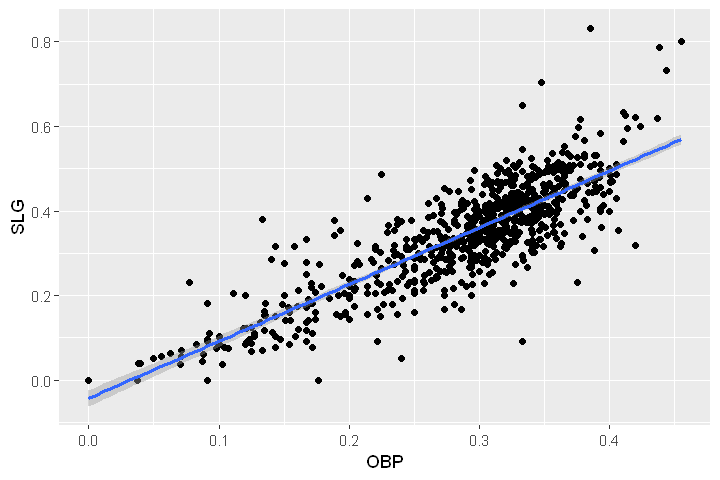

In [113]:
# Create nontrivial_players
nontrivial_players <- mlbBat10 %>%
  filter(AB >= 10 & OBP < 0.5)


# Fit model to new data
mod_cleaner <-  lm(SLG ~ OBP, data = nontrivial_players)

# View model summary
summary(mod_cleaner)
summary(mod)
# Visualize new model
ggplot(nontrivial_players, aes(x = OBP, y = SLG)) +
  geom_point() +
  geom_smooth(method = "lm")

### High leverage points

Not all points of high leverage are influential. While the high leverage observation corresponding to Bobby Scales in the previous exercise is influential, the three observations for players with OBP and SLG values of 0 are not influential.

This is because they happen to lie right near the regression anyway. Thus, while their extremely low OBP gives them the power to exert influence over the slope of the regression line, their low SLG prevents them from using it.

In [114]:
# Rank high leverage points
mod %>%
  augment() %>%
  arrange(desc(.hat), .cooksd) %>%
  head()

wgt,hgt,.fitted,.se.fit,.resid,.hat,.sigma,.cooksd,.std.resid
85.5,198.1,96.57863,1.255712,-11.078629,0.01819968,9.303950,0.0133734319,-1.2012024
90.9,197.1,95.56101,1.214264,-4.661012,0.01701803,9.314916,0.0022081690,-0.5050673
49.8,147.2,44.78194,1.131432,5.018065,0.01477545,9.314548,0.0022120570,0.5431383
80.7,193.5,91.89759,1.066733,-11.197592,0.01313394,9.303732,0.0097584634,-1.2109808
95.9,193.0,91.38878,1.046493,4.511216,0.01264027,9.315075,0.0015228117,0.4877505
44.8,149.5,47.12245,1.037916,-2.322454,0.01243391,9.316688,0.0003968468,-0.2510763
